### Evolutionary Dynamics Visualization

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [2]:
def xyz_plot(coords):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = []
    y = []
    z = []
    for i in range(len(coords)):
        x.append(coords[i][0])
        y.append(coords[i][1])
        z.append(coords[i][2])
        
    ax.scatter(x, y, z, c='r')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')
    plt.show()

In [3]:
# Utility matrix for 2 player symmetric game
A = np.array([[0, 5, 4],
             [4, 0, 5],
             [5, 4, 0]])
# Initial point
x_start = np.array([0.25, 0.5, 0.25])

# List of parameter nabla for logit dynamics
etta = np.array([0.01, 0.1, 1])

#### a) Replicator Dynamics

In [8]:
def replicator_dynamics(x_initial, num_iter, matrix, learning_rate=1e-3):
    """ Function that returns list of coordinates given replicator dynamics and initial point

    Args:
        x_initial: Starting point
        num_iter: Number of iterations
        matrix: symmetric game matrix
    Returns:
        List of x coordinates of length num_iter

    """
    x_curr = x_initial.copy()
    positions = []
    
    for i in range(num_iter):
        positions.append(x_curr.copy())
        f = np.matmul(matrix, x_curr)
        avg_payoff = np.matmul(np.transpose(x_curr), f)  # Average payoff
        f_bar = np.multiply(avg_payoff, np.ones(3))  # Average payoff vector
        x_dot = np.multiply(x_curr, (f - f_bar))  # Displacement vector
        x_curr += learning_rate * x_dot  # Update position
        
    return positions  

In [9]:
max_iter = 5000
coords_a = replicator_dynamics(x_start, max_iter, A)

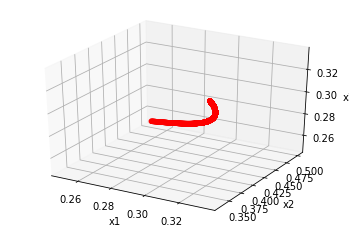

In [10]:
xyz_plot(coords_a)

#### b) BNN Dynamics

In [11]:
def bnn_dynamics(x_initial, num_iter, matrix, learning_rate=1e-3):
    """ Function that returns list of coordinates given BNN dynamics and initial point

    Args:
        x_initial: Starting point
        num_iter: Number of iterations
        matrix: symmetric game matrix
    Returns:
        List of x coordinates of length num_iter

    """
    x_curr = x_initial.copy()
    positions = []
    
    for i in range(num_iter):
        positions.append(x_curr.copy())
        f = np.matmul(matrix, x_curr)
        avg_payoff = np.matmul(np.transpose(x_curr), f)  # Average payoff
        f_bar = np.multiply(avg_payoff, np.ones(3))  # Average payoff vector
        pi_hat_plus = np.maximum((f-f_bar),np.zeros(3)) # sign function pi_hat
        x_dot = pi_hat_plus - np.multiply(x_curr, pi_hat_plus.sum())  # Displacement vector
        x_curr += learning_rate * x_dot  # Update position
        
    return positions  

In [12]:
max_iter = 500
coords_b = bnn_dynamics(x_start, max_iter, A, 1e-2)

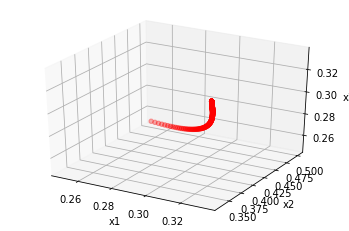

In [13]:
xyz_plot(coords_b)

#### c) Smith Dynamics

In [55]:
def smith_dynamics(x_initial, num_iter, matrix, learning_rate=1e-3):
    """ Function that returns list of coordinates given Smith dynamics and initial point

    Args:
        x_initial: Starting point
        num_iter: Number of iterations
        matrix: symmetric game matrix
    Returns:
        List of x coordinates of length num_iter

    """
    x_curr = x_initial.copy()
    positions = []
    
    for i in range(num_iter):
        positions.append(x_curr.copy())
        f = np.matmul(matrix, x_curr)
        
        in_unsigned = np.multiply(A, x_curr) - f
        in_signed = np.maximum(in_unsigned, np.zeros(3)).sum(axis=0)
        
        out_unsigned = f - np.multiply(A, x_curr)
        out_signed = np.maximum(out_unsigned, np.zeros(3)).sum(axis=0)
        out = np.multiply(x_curr, out_signed.sum())
        
        
        x_dot = in_signed - out  # Displacement vector
        x_curr += learning_rate * x_dot  # Update position
        
    return positions  

In [56]:
smith_dynamics(x_start, max_iter, A, 1e-2)

[array([0.25, 0.5 , 0.25]),
 array([0.204375, 0.41125 , 0.204375]),
 array([0.17376601, 0.35182635, 0.17376601]),
 array([0.15155231, 0.30880234, 0.15155231]),
 array([0.13458699, 0.27603429, 0.13458699]),
 array([0.12115166, 0.25016767, 0.12115166]),
 array([0.11021778, 0.2291949 , 0.11021778]),
 array([0.10112772, 0.21183251, 0.10112772]),
 array([0.09343939, 0.19721787, 0.09343939]),
 array([0.08684362, 0.18474786, 0.08684362]),
 array([0.08111717, 0.17398709, 0.08111717]),
 array([0.0760945 , 0.16461285, 0.0760945 ]),
 array([0.07165009, 0.15638053, 0.07165009]),
 array([0.06768691, 0.14910117, 0.06768691]),
 array([0.06412869, 0.14262634, 0.06412869]),
 array([0.06091464, 0.13683782, 0.06091464]),
 array([0.05799563, 0.13164017, 0.05799563]),
 array([0.05532887, 0.12699549, 0.05532887]),
 array([0.05288068, 0.12284659, 0.05288068]),
 array([0.05062336, 0.1191403 , 0.05062336]),
 array([0.04853362, 0.1158326 , 0.04853362]),
 array([0.04659175, 0.11288692, 0.04659175]),
 array([0.04

#### d) Logit Dynamics

In [14]:
def sigma(vec, eta):
    """Function that applies the logit operator pointwise using a temperature value.

    Args:
        vec: vector to pass through logit function
        eta: temperature
    Returns:
        List of x coordinates
    
    """
    
    return np.exp(1./eta*vec)/np.exp(1./eta*vec).sum()

def logit_dynamics(x_initial, num_iter, matrix, eta=1e-2,learning_rate=1e-2, early_stopping=True):
    """ Function that returns list of coordinates given logit dynamics and initial point

    Args:
        x_initial: Starting point
        num_iter: Number of iterations
        matrix: symmetric game matrix
        eta: temperature
    Returns:
        List of x coordinates of length num_iter

    """
    x_curr = x_initial.copy()
    positions = []
    
    for i in range(num_iter):
        positions.append(x_curr.copy())
        f = np.matmul(matrix, x_curr)
        x_dot = sigma(f, eta) - x_curr  # Displacement vector
        x_curr += learning_rate * x_dot  # Update position
        
    return positions

In [15]:
max_iter = 75
coords_d = logit_dynamics(x_start, max_iter, A, 1e-2)

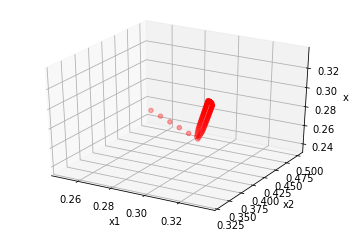

In [16]:
xyz_plot(coords_d)